### Task 1.
 Implement the NOR Boolean logic gate using perceptron Neural Network. Inputs = x1, x2 and bias, weights should be fed into the perceptron with single Output = y. Display final weights and bias of each perceptron. 
### Task 2
Take the dataset of Diabetes 2 
- Initialize a neural network with random weights. 
- Calculate output of Neural Network: 
    1.  Calculate squared error loss 
    2. Update network parameter using batch Mini Batch gradient descent optimizer function Implementation. 
    3. Display updated weight and bias values 
    4. Plot loss w.r.t. bias values

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1: Implement NOR Boolean Logic Gate using Perceptron

print("="*60)
print("TASK 1: NOR GATE USING PERCEPTRON")
print("="*60)

# NOR Truth Table:
# x1  x2  | y
# 0   0   | 1
# 0   1   | 0
# 1   0   | 0
# 1   1   | 0

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([1, 0, 0, 0])

print("\nNOR Truth Table:")
print("x1  x2  |  y")
print("-"*15)
for i in range(len(X)):
    print(f"{X[i][0]}   {X[i][1]}   |  {y[i]}")

TASK 1: NOR GATE USING PERCEPTRON

NOR Truth Table:
x1  x2  |  y
---------------
0   0   |  1
0   1   |  0
1   0   |  0
1   1   |  0


In [75]:
# Step activation function
def step(z):
    return 1 if z >= 0 else 0

# Initialize weights and bias randomly
np.random.seed(42)
w = np.random.rand(2)
b = np.random.rand(1)

print(f"\nInitial weights: {w}")
print(f"Initial bias: {b}")

# Training parameters
epochs = 100
learning_rate = 0.1

print("\nTraining NOR Perceptron...")

# Training loop
for epoch in range(epochs):
    total_error = 0
    for i in range(X.shape[0]):
        # Forward pass
        z = np.dot(w, X[i]) + b
        y_pred = step(z)
        
        # Calculate error
        error = y[i] - y_pred
        total_error += abs(error)
        
        # Update weights and bias
        w += learning_rate * error * X[i]
        b += learning_rate * error
    
    # Stop if converged
    if total_error == 0:
        print(f"Converged at epoch {epoch + 1}")
        break


Initial weights: [0.37454012 0.95071431]
Initial bias: [0.73199394]

Training NOR Perceptron...
Converged at epoch 10


In [76]:
# Display final weights and bias
print("\n" + "="*60)
print("FINAL WEIGHTS AND BIAS FOR NOR PERCEPTRON")
print("="*60)
print(f"\nTrained weights: {w}")
print(f"Trained bias: {b}")

# Test the trained perceptron
print("\nTesting NOR Perceptron:")
print("x1  x2  | Predicted | Actual")
print("-"*35)
for i in range(len(X)):
    z = np.dot(w, X[i]) + b
    prediction = step(z)
    print(f"{X[i][0]}   {X[i][1]}   |     {prediction}     |   {y[i]}")

# Verify all predictions are correct
correct = sum([step(np.dot(w, X[i]) + b) == y[i] for i in range(len(X))])
print(f"\nAccuracy: {correct}/{len(X)} = {(correct/len(X))*100:.0f}%")


FINAL WEIGHTS AND BIAS FOR NOR PERCEPTRON

Trained weights: [-0.22545988 -0.04928569]
Trained bias: [0.03199394]

Testing NOR Perceptron:
x1  x2  | Predicted | Actual
-----------------------------------
0   0   |     1     |   1
0   1   |     0     |   0
1   0   |     0     |   0
1   1   |     0     |   0

Accuracy: 4/4 = 100%


In [77]:
print("\n" + "="*60)
print("TASK 2: DIABETES DATASET WITH MINI-BATCH GRADIENT DESCENT")
print("="*60)

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

# Load Diabetes dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target.reshape(-1, 1)

# Standardize features (already somewhat standardized, but ensuring consistency)
scaler_X = StandardScaler()
X_diabetes = scaler_X.fit_transform(X_diabetes)

# Standardize target for better training
scaler_y = StandardScaler()
y_diabetes = scaler_y.fit_transform(y_diabetes)

print(f"\nDataset shape: X={X_diabetes.shape}, y={y_diabetes.shape}")
print(f"Number of features: {X_diabetes.shape[1]}")
print(f"Number of samples: {X_diabetes.shape[0]}")
print(f"Feature names: {diabetes.feature_names}")


TASK 2: DIABETES DATASET WITH MINI-BATCH GRADIENT DESCENT

Dataset shape: X=(442, 10), y=(442, 1)
Number of features: 10
Number of samples: 442
Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [78]:
# Initialize Neural Network with random weights
input_size = X_diabetes.shape[1]  # 10 features
hidden_size = 8
output_size = 1

np.random.seed(42)

# Layer 1: Input -> Hidden
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))

# Layer 2: Hidden -> Output
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

print("\nInitial Network Architecture:")
print(f"Input Layer: {input_size} neurons")
print(f"Hidden Layer: {hidden_size} neurons")
print(f"Output Layer: {output_size} neuron")
print(f"\nW1 shape: {W1.shape}")
print(f"b1 shape: {b1.shape}")
print(f"W2 shape: {W2.shape}")
print(f"b2 shape: {b2.shape}")


Initial Network Architecture:
Input Layer: 10 neurons
Hidden Layer: 8 neurons
Output Layer: 1 neuron

W1 shape: (10, 8)
b1 shape: (1, 8)
W2 shape: (8, 1)
b2 shape: (1, 1)


In [79]:
# Define activation functions
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return (z > 0).astype(float)

# Forward propagation
def forward_pass(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Linear activation for regression
    
    cache = {'Z1': Z1, 'A1': A1, 'Z2': Z2, 'A2': A2}
    return A2, cache

# Calculate squared error loss (MSE)
def compute_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return loss

# Backward propagation
def backward_pass(X, y, cache, W1, W2):
    m = X.shape[0]
    
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    # Output layer gradients
    dZ2 = (A2 - y)
    dW2 = (1 / m) * np.dot(A1.T, dZ2)
    db2 = (1 / m) * np.sum(dZ2, axis=0, keepdims=True)
    
    # Hidden layer gradients
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1 / m) * np.dot(X.T, dZ1)
    db1 = (1 / m) * np.sum(dZ1, axis=0, keepdims=True)
    
    gradients = {'dW1': dW1, 'db1': db1, 'dW2': dW2, 'db2': db2}
    return gradients

print("\nForward and Backward propagation functions defined.")


Forward and Backward propagation functions defined.


In [80]:
# Mini-Batch Gradient Descent Optimizer with Momentum
def mini_batch_gradient_descent(X, y, W1, b1, W2, b2, batch_size=32, learning_rate=0.01, epochs=100, momentum=0.9):
    """
    Mini-Batch Gradient Descent Optimizer with Momentum
    Updates weights using gradients computed on mini-batches of data
    """
    m = X.shape[0]
    loss_history = []
    
    # Initialize velocity for momentum
    vW1 = np.zeros_like(W1)
    vb1 = np.zeros_like(b1)
    vW2 = np.zeros_like(W2)
    vb2 = np.zeros_like(b2)
    
    print("\nTraining with Mini-Batch Gradient Descent with Momentum...")
    print(f"Batch size: {batch_size}")
    print(f"Learning rate: {learning_rate}")
    print(f"Momentum: {momentum}")
    print(f"Epochs: {epochs}")
    print("-" * 60)
    
    for epoch in range(epochs):
        # Shuffle the data at the start of each epoch
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        
        epoch_loss = 0
        num_batches = 0
        
        # Process mini-batches
        for i in range(0, m, batch_size):
            # Get mini-batch
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            
            # Forward propagation
            y_pred, cache = forward_pass(X_batch, W1, b1, W2, b2)
            
            # Compute loss
            batch_loss = compute_loss(y_batch, y_pred)
            epoch_loss += batch_loss
            num_batches += 1
            
            # Backward propagation
            gradients = backward_pass(X_batch, y_batch, cache, W1, W2)
            
            # Update velocity with momentum
            vW1 = momentum * vW1 - (1-momentum) * learning_rate * gradients['dW1']
            vb1 = momentum * vb1 - (1-momentum) * learning_rate * gradients['db1']
            vW2 = momentum * vW2 - (1-momentum) * learning_rate * gradients['dW2']
            vb2 = momentum * vb2 - (1-momentum) * learning_rate * gradients['db2']
            
            # Update parameters
            W1 += vW1
            b1 += vb1
            W2 += vW2
            b2 += vb2
        
        # Calculate average loss for the epoch
        avg_loss = epoch_loss / num_batches
        loss_history.append(avg_loss)
        
        # Print progress every 10 epochs
        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.6f}")
    
    parameters = {'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
    return parameters, loss_history

# Train the network with momentum
trained_params, loss_history = mini_batch_gradient_descent(
    X_diabetes, y_diabetes, W1, b1, W2, b2,
    batch_size=32,
    learning_rate=0.01,
    epochs=100,
    momentum=0.9
)


Training with Mini-Batch Gradient Descent with Momentum...
Batch size: 32
Learning rate: 0.01
Momentum: 0.9
Epochs: 100
------------------------------------------------------------
Epoch 10/100, Loss: 0.502542
Epoch 20/100, Loss: 0.494495
Epoch 30/100, Loss: 0.482979
Epoch 40/100, Loss: 0.410845
Epoch 50/100, Loss: 0.300766
Epoch 60/100, Loss: 0.259209
Epoch 70/100, Loss: 0.246893
Epoch 80/100, Loss: 0.241139
Epoch 90/100, Loss: 0.236405
Epoch 100/100, Loss: 0.235396


In [81]:
# Display updated weights and bias values
print("\n" + "="*60)
print("UPDATED WEIGHTS AND BIASES AFTER TRAINING")
print("="*60)

print("\nLayer 1 (Input -> Hidden):")
print(f"W1 shape: {trained_params['W1'].shape}")
print(f"W1:\n{trained_params['W1']}")
print(f"\nb1 shape: {trained_params['b1'].shape}")
print(f"b1:\n{trained_params['b1']}")

print("\nLayer 2 (Hidden -> Output):")
print(f"W2 shape: {trained_params['W2'].shape}")
print(f"W2:\n{trained_params['W2']}")
print(f"\nb2 shape: {trained_params['b2'].shape}")
print(f"b2:\n{trained_params['b2']}")

print("\n" + "="*60)
print(f"Initial Loss: {loss_history[0]:.6f}")
print(f"Final Loss: {loss_history[-1]:.6f}")
print(f"Loss Reduction: {loss_history[0] - loss_history[-1]:.6f}")
print("="*60)


UPDATED WEIGHTS AND BIASES AFTER TRAINING

Layer 1 (Input -> Hidden):
W1 shape: (10, 8)
W1:
[[ 2.47342365e-02  1.28146223e-01  7.28478797e-03  2.91099200e-02
   2.59524287e-03  5.71769578e-02  2.14592242e-02  8.90493460e-03]
 [ 5.21467753e-02 -5.09483827e-02 -4.34969289e-03 -9.84868394e-03
   2.90145134e-02  1.61151871e-01 -1.55273897e-02 -4.53354771e-03]
 [-8.27471376e-02  4.85567088e-01 -3.15270329e-03  2.55053325e-02
  -1.76396623e-02 -2.14073554e-01  1.45929960e-02 -6.41571912e-03]
 [-3.85875790e-02  3.08167459e-01 -5.38085601e-03  2.79910522e-02
  -3.02718144e-02 -1.01180669e-01  3.54565249e-03  2.42816327e-02]
 [ 7.84345964e-04 -3.53513473e-02  1.06785430e-02 -1.86928742e-02
   3.41757099e-04 -2.37532289e-02 -1.38561420e-02  2.21928722e-03]
 [ 2.07599606e-02 -8.89996479e-02  8.52199391e-04 -1.62507773e-02
  -8.93091303e-03  3.39767186e-02 -5.91731211e-03  9.93522915e-03]
 [ 6.94875424e-02 -9.85802493e-02 -2.87789859e-03 -1.02952966e-02
   1.51782026e-02  1.80000957e-01  6.039108


Generating loss surface with respect to bias values...


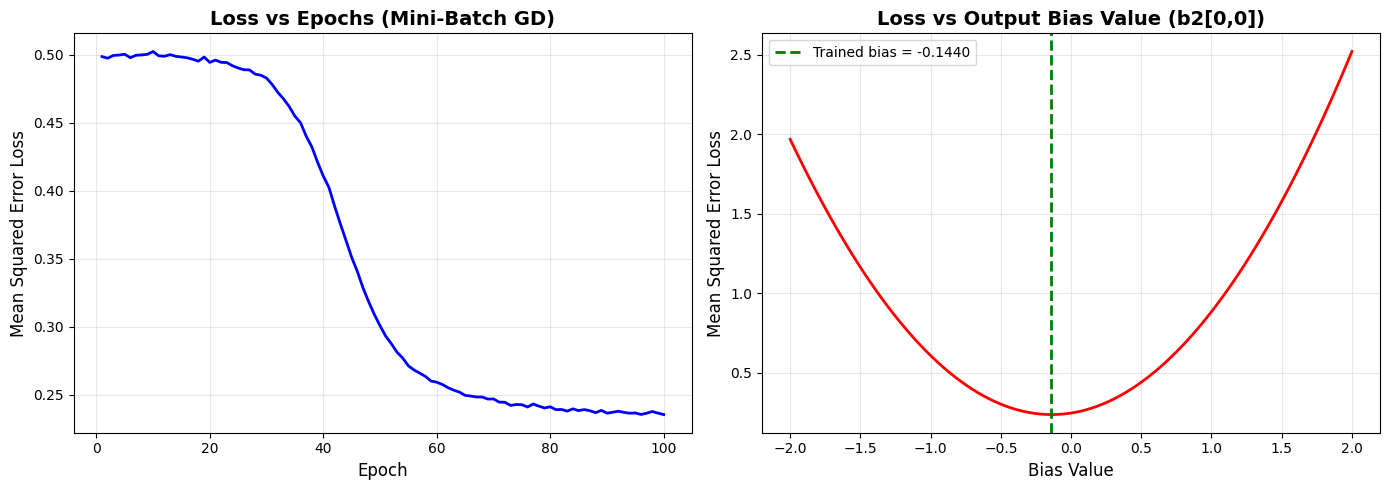


Optimal bias value (after training): -0.143967
Loss at optimal bias: 0.235860


In [82]:
# Plot loss w.r.t. bias values
# We'll vary one bias value and see how loss changes

print("\nGenerating loss surface with respect to bias values...")

# Select one bias from b2 to vary (output layer bias)
bias_range = np.linspace(-2, 2, 100)
loss_vs_bias = []

# Keep all parameters constant except one bias value
W1_temp = trained_params['W1'].copy()
b1_temp = trained_params['b1'].copy()
W2_temp = trained_params['W2'].copy()
b2_temp = trained_params['b2'].copy()

# Store original bias value
original_bias = b2_temp[0, 0]

for bias_val in bias_range:
    # Set the bias to test value
    b2_temp[0, 0] = bias_val
    
    # Forward pass with this bias
    y_pred, _ = forward_pass(X_diabetes, W1_temp, b1_temp, W2_temp, b2_temp)
    
    # Compute loss
    loss = compute_loss(y_diabetes, y_pred)
    loss_vs_bias.append(loss)

# Restore original bias
b2_temp[0, 0] = original_bias

# Create the plot
plt.figure(figsize=(14, 5))

# Plot 1: Loss vs Epochs
plt.subplot(1, 2, 1)
plt.plot(range(1, len(loss_history) + 1), loss_history, linewidth=2, color='blue')
plt.title('Loss vs Epochs (Mini-Batch GD)', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.grid(True, alpha=0.3)

# Plot 2: Loss vs Bias Value
plt.subplot(1, 2, 2)
plt.plot(bias_range, loss_vs_bias, linewidth=2, color='red')
plt.axvline(x=original_bias, color='green', linestyle='--', linewidth=2, label=f'Trained bias = {original_bias:.4f}')
plt.title('Loss vs Output Bias Value (b2[0,0])', fontsize=14, fontweight='bold')
plt.xlabel('Bias Value', fontsize=12)
plt.ylabel('Mean Squared Error Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nOptimal bias value (after training): {original_bias:.6f}")
print(f"Loss at optimal bias: {compute_loss(y_diabetes, forward_pass(X_diabetes, trained_params['W1'], trained_params['b1'], trained_params['W2'], trained_params['b2'])[0]):.6f}")